In [1]:
from utils.tools import * 

In [2]:
path=r"C:\Users\cjang\Desktop\\"
path2 = r"C:\Users\cjang\Desktop\impedance_data\data\\" 
data = ['DE_40_1_30.mpt']

In [3]:
re = mpt_data(path, data)
re2 = mpt_data(path2, data)


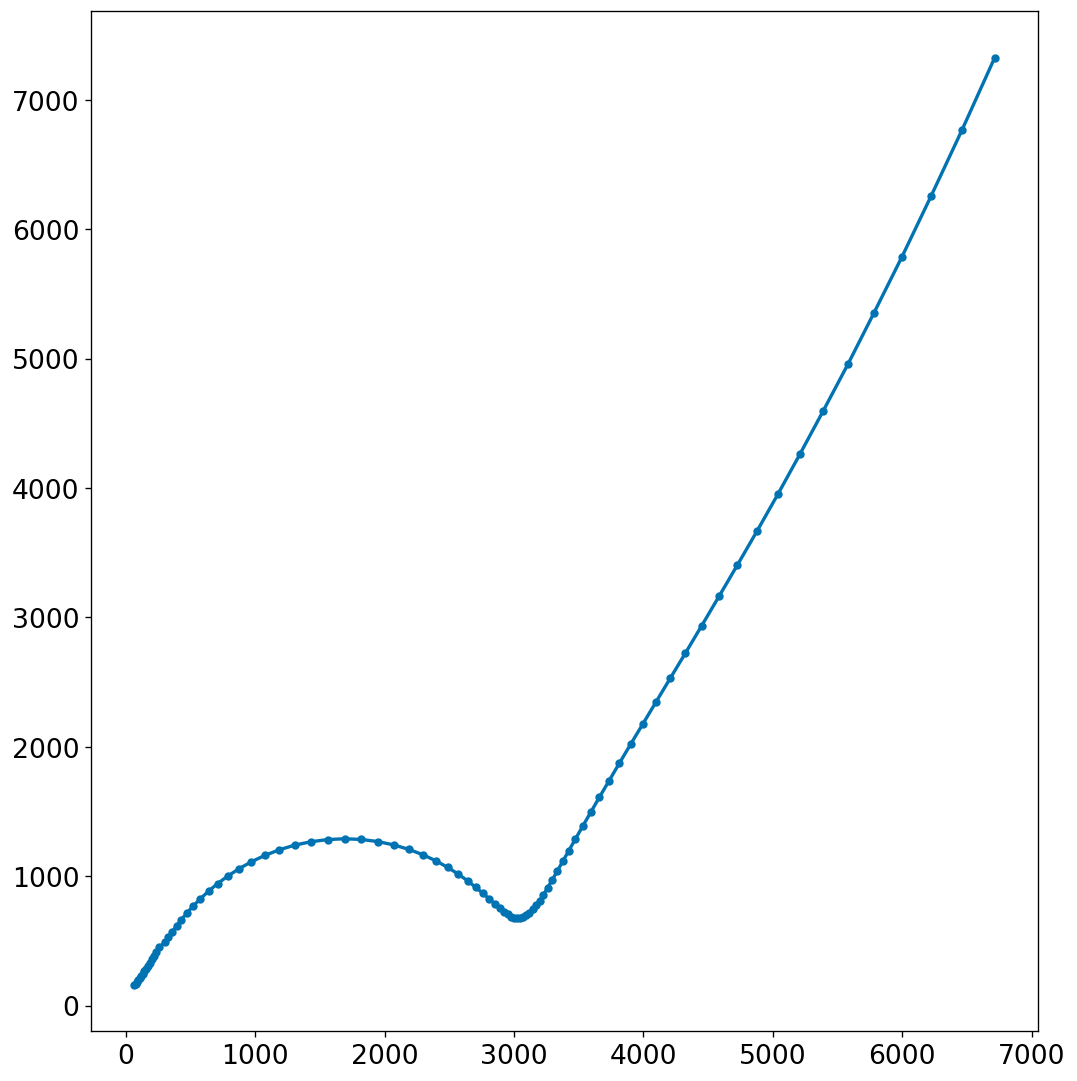

In [4]:
pre = importer(path, data, mask_front = 6, mask_back = 1.5, width = 10, height = 10)

adj_re = pre[0]

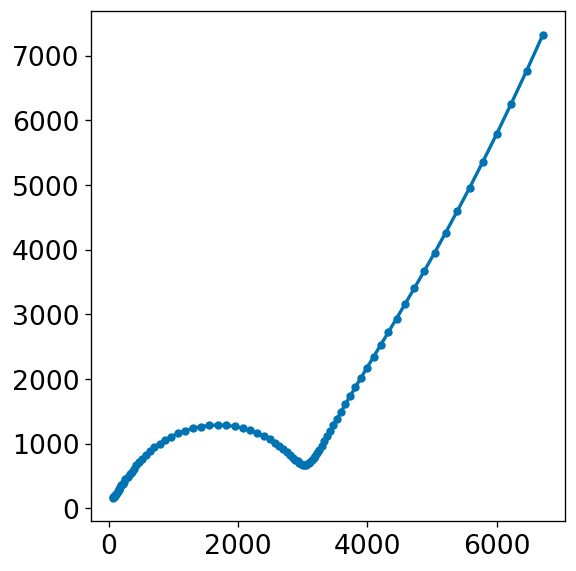

In [6]:
adj_re.set_new_gph_dims(5,5)
adj_re.mpt_plot()

In [41]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 40
    # variables        = 7
    chi-square         = 14106.9010
    reduced chi-square = 427.481849
    Akaike info crit   = 248.621597
    Bayesian info crit = 260.443754
[[Variables]]
    Rs:   115.076173 +/- 664.249275 (577.23%) (init = 1000)
    R:    302.887014 +/- 5095212.59 (1682215.60%) (init = 2959)
    n:    0.83198721 +/- 626.684447 (75323.81%) (init = 0.8)
    fs:   16527.5062 +/- 1.2861e+08 (778139.97%) (init = 23023)
    R2:   1095557.60 +/- 2.5104e+11 (22914258.57%) (init = 258738)
    n2:   0.71595084 +/- 72.5194351 (10129.11%) (init = 0.8)
    fs2:  3.17110363 +/- 1023486.98 (32275418.72%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(R, n)    = -1.000
    C(n2, fs2) =  1.000
    C(R2, n2)  = -1.000
    C(n, fs)   =  0.999
    C(R, fs)   = -0.999
    C(R, n2)   = -0.998
    C(R, fs2)  = -0.998
    C(R, R2)   =  0

In [42]:
adj_re.fit_Rs[0]


115.07617300214129

In [43]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params1 = Parameters()
params1.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params1.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params1.add('n', value=n_guess, min=.65, max=1.2)
params1.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params1.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params1.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params1.add('n2', value=n2_guess, min=.65, max=1.2)
params1.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params1.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params1, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1770
    # data points      = 40
    # variables        = 7
    chi-square         = 0.59421772
    reduced chi-square = 0.01800660
    Akaike info crit   = -154.375558
    Bayesian info crit = -142.553402
[[Variables]]
    Rs:   1.15076173 +/- 12.8683857 (1118.25%) (init = 302.887)
    R:    2281.56836 +/- 27869.6989 (1221.51%) (init = 302.887)
    n:    0.74174374 +/- 0.82881886 (111.74%) (init = 0.8319872)
    fs:   19927.5847 +/- 144872.039 (726.99%) (init = 16527.51)
    R2:   2189093.73 +/- 1.6494e+08 (7534.81%) (init = 1095558)
    n2:   0.77987912 +/- 5.70384159 (731.38%) (init = 0.7159508)
    fs2:  0.60602841 +/- 34.3779100 (5672.66%) (init = 3.171104)
[[Correlations]] (unreported correlations are < 0.100)
    C(n, n2)   = -1.000
    C(R, fs)   = -0.999
    C(R, n)    = -0.997
    C(R, n2)   =  0.996
    C(n, fs)   =  0.992
    C(fs, n2)  = -0.990
    C(fs, R2)  = -0.914
    C(R, R2)   =  0.902
    C

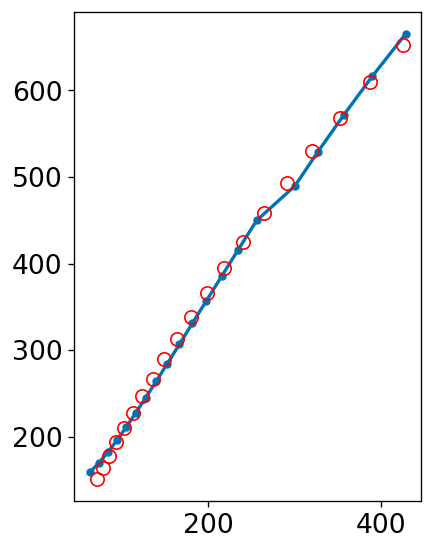

In [44]:
adj_re.mpt_plot(fitting = 'on')

In [45]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params2 = Parameters()
params2.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params2.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params2.add('n', value=n_guess, min=.65, max=1.2)
params2.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params2.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params2.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params2.add('n2', value=n2_guess, min=.65, max=1.2)
params2.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params2.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params2, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 40
    # variables        = 7
    chi-square         = 11.5129972
    reduced chi-square = 0.34887870
    Akaike info crit   = -35.8161146
    Bayesian info crit = -23.9939584
[[Variables]]
    Rs:   2.11929674 +/- 37.4245890 (1765.90%) (init = 115.0762)
    R:    2884.85436 +/- 236310.875 (8191.43%) (init = 2281.568)
    n:    0.76457577 +/- 1.69093630 (221.16%) (init = 0.7417437)
    fs:   15758.4242 +/- 683802.306 (4339.28%) (init = 19927.58)
    R2:   1382913.27 +/- 3.4651e+11 (25056676.44%) (init = 2189094)
    n2:   0.72887669 +/- 3.81985074 (524.07%) (init = 0.7798791)
    fs2:  0.33889810 +/- 116629.609 (34414359.23%) (init = 0.6060284)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(R, fs)   = -0.996
    C(R, R2)   =  0.981
    C(R, fs2)  = -0.981
    C(fs, R2)  = -0.959
    C(fs, fs2) =  0.959
    C(n, fs)   =  0.958
    C(R, n)    = -0

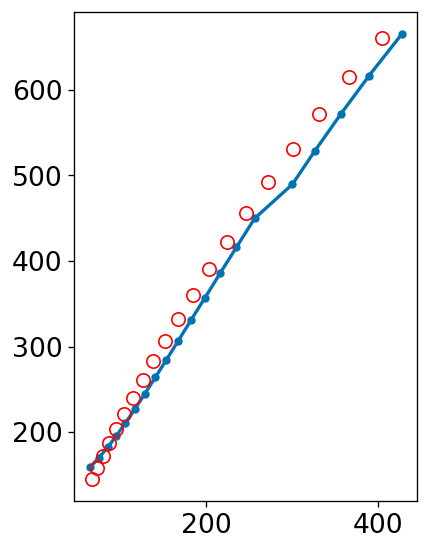

In [46]:
adj_re.mpt_plot(fitting = 'on')

In [47]:
print(adj_re.fit_Rs[0])

print(adj_re.fit_R[0])

print(adj_re.fit_n[0])

print(adj_re.fit_fs[0])

print(adj_re.fit_R2[0])

print(adj_re.fit_n2[0])

print(adj_re.fit_fs2[0])


2.1192967441131296
2884.8543566955145
0.7645757727986211
15758.42422441053
1382913.265255882
0.7288766867621496
0.33889809969837


In [48]:
50.59,2.626e-9,1,54.58,1.457e-6,0.9547,4.793

(50.59, 2.626e-09, 1, 54.58, 1.457e-06, 0.9547, 4.793)

In [49]:
1/(adj_re.fit_R[0] * adj_re.fit_fs[0] * 2 * np.pi)**adj_re.fit_n[0], 1/(adj_re.fit_R2[0] * adj_re.fit_fs2[0] * 2 * np.pi)**adj_re.fit_n2[0]

(3.4267902909198383e-07, 1.9269244316099257e-05)

In [50]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params3 = Parameters()
params3.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params3.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params3.add('n', value=n_guess, min=.65, max=1.2)
params3.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params3.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params3.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params3.add('n2', value=n2_guess, min=.65, max=1.2)
params3.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params3.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params2, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 40
    # variables        = 7
    chi-square         = 11.5129972
    reduced chi-square = 0.34887870
    Akaike info crit   = -35.8161146
    Bayesian info crit = -23.9939584
[[Variables]]
    Rs:   2.11929674 +/- 37.4245890 (1765.90%) (init = 115.0762)
    R:    2884.85436 +/- 236310.875 (8191.43%) (init = 2281.568)
    n:    0.76457577 +/- 1.69093630 (221.16%) (init = 0.7417437)
    fs:   15758.4242 +/- 683802.306 (4339.28%) (init = 19927.58)
    R2:   1382913.27 +/- 3.4651e+11 (25056676.44%) (init = 2189094)
    n2:   0.72887669 +/- 3.81985074 (524.07%) (init = 0.7798791)
    fs2:  0.33889810 +/- 116629.609 (34414359.23%) (init = 0.6060284)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(R, fs)   = -0.996
    C(R, R2)   =  0.981
    C(R, fs2)  = -0.981
    C(fs, R2)  = -0.959
    C(fs, fs2) =  0.959
    C(n, fs)   =  0.958
    C(R, n)    = -0

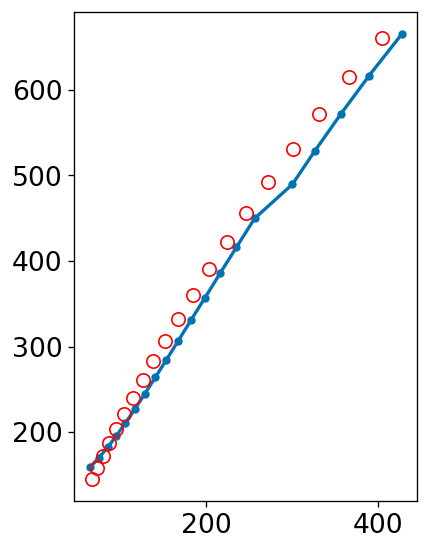

In [51]:
adj_re.mpt_plot(fitting = 'on')

In [52]:
print(adj_re.fit_Rs[0])

print(adj_re.fit_R[0])

print(adj_re.fit_n[0])

print(adj_re.fit_fs[0])

print(adj_re.fit_R2[0])

print(adj_re.fit_n2[0])

print(adj_re.fit_fs2[0])


2.1192967441131296
2884.8543566955145
0.7645757727986211
15758.42422441053
1382913.265255882
0.7288766867621496
0.33889809969837


In [53]:
1/(adj_re.fit_R[0] * adj_re.fit_fs[0] * 2 * np.pi)**adj_re.fit_n[0], 1/(adj_re.fit_R2[0] * adj_re.fit_fs2[0] * 2 * np.pi)**adj_re.fit_n2[0]

(3.4267902909198383e-07, 1.9269244316099257e-05)